---
#  mplfinance
---
## Test Pandas.`resample()`.
---

In [1]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd
pd.__version__  # for the record
%matplotlib inline

'0.24.2'

In [3]:
# daily = pd.read_csv('../data/SP500_NOV2019_Hist.csv',index_col=0,parse_dates=True)
# daily.index.name = 'Date'
# daily.shape
# daily.head(3)
# daily.tail(3)

In [4]:
import mplfinance as mpf

In [5]:
intraday = pd.read_csv('../data/SP500_NOV2019_IDay.csv',index_col=0,parse_dates=True)
intraday = intraday.drop('Volume',axis=1) # Volume is zero anyway for this intraday data set
intraday.index.name = 'Date'
intraday.shape
intraday.head(3)
intraday.tail(3)

(1563, 4)

,Open,Close,High,Low
Date,,,,
2019-11-05 09:30:00,3080.80,3080.49,3081.47,3080.30
2019-11-05 09:31:00,3080.33,3079.36,3080.33,3079.15
2019-11-05 09:32:00,3079.43,3079.68,3080.46,3079.43


,Open,Close,High,Low
Date,,,,
2019-11-08 15:57:00,3090.73,3090.70,3091.02,3090.52
2019-11-08 15:58:00,3090.73,3091.04,3091.13,3090.58
2019-11-08 15:59:00,3091.16,3092.91,3092.91,3090.96


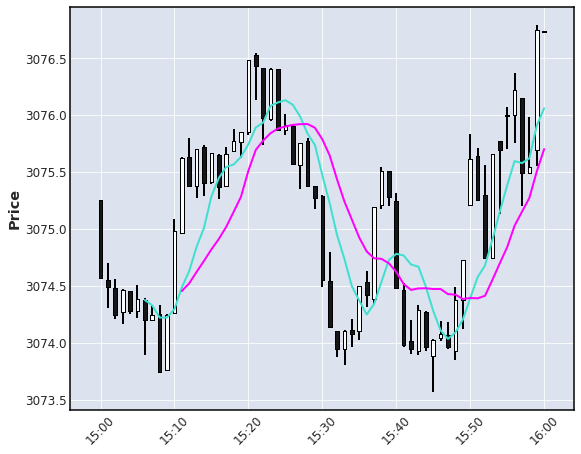

In [6]:
iday = intraday.loc['2019-11-06 15:00':'2019-11-06 16:00',:]
mpf.plot(iday,type='candle',mav=(7,12))

In [7]:
df = pd.read_csv('../data/yahoofinance-SPY-20080101-20180101.csv',index_col=0,parse_dates=True)
df.shape
df.head(3)
df.tail(3)

(2519, 6)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-12-31,147.100006,147.610001,146.059998,146.210007,118.624741,108126800
2008-01-02,146.529999,146.990005,143.880005,144.929993,117.586205,204935600
2008-01-03,144.910004,145.490005,144.070007,144.860001,117.529449,125133300


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-27,267.380005,267.730011,267.010010,267.320007,267.320007,57751000
2017-12-28,267.890015,267.920013,267.450012,267.869995,267.869995,45116100
2017-12-29,268.529999,268.549988,266.640015,266.859985,266.859985,96007400


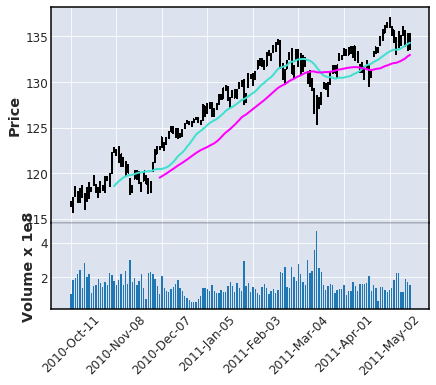

In [8]:
mpf.plot(df[700:850],type='bars',volume=True,no_xgaps=True,mav=(20,40),figscale=0.75)

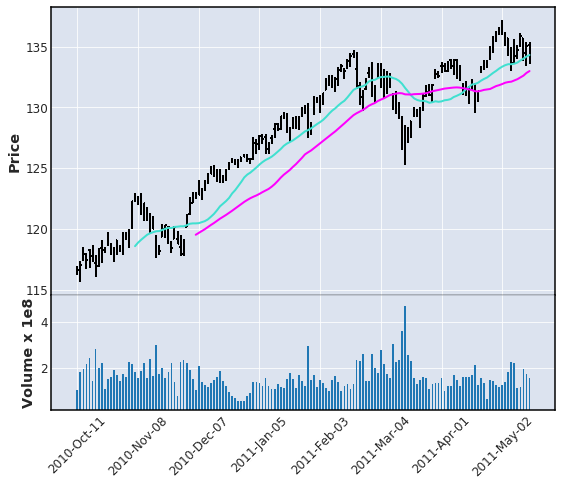

In [9]:
mpf.plot(df[700:850],type='bars',volume=True,no_xgaps=True,mav=(20,40))

In [10]:
#mpf.plot(df[700:850],type='bars',volume=True,mav=(20,40))
tdf = df[700:850].copy()

In [11]:
ntdf = tdf.resample('1W').agg(
    {'Open'  :'first',
     'High'  :'max',
     'Low'   :'min',
     'Close' :'last',
     'Volume':'sum'
    })

In [12]:
#dir(ntdf)
tdf.head(7)
ntdf.head(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-10-11,116.720001,116.970001,116.250000,116.650002,100.581131,103098300
2010-10-12,116.269997,117.349998,115.650002,117.010002,100.891541,182210000
2010-10-13,117.660004,118.550003,117.379997,117.919998,101.676186,194347200
2010-10-14,117.809998,118.010002,116.720001,117.459999,101.279564,217764300
2010-10-15,118.279999,118.349998,116.760002,117.699997,101.486496,243705000
2010-10-18,117.739998,118.669998,117.309998,118.279999,101.986603,141204800
2010-10-19,117.190002,117.849998,116.019997,116.730003,100.650116,280604700


,Open,High,Low,Close,Volume
Date,,,,,
2010-10-17,116.720001,118.550003,115.650002,117.699997,941124800
2010-10-24,117.739998,119.089996,116.019997,118.349998,951659200
2010-10-31,119.139999,119.760002,117.260002,118.489998,813034100


In [13]:
tdf.loc['2010-10-11':'2010-10-15','Volume'].sum()

941124800

In [14]:
tdf.loc['2010-10-11':'2010-10-15','Open'][0]
tdf.loc['2010-10-11':'2010-10-15','Close'][4]
tdf.loc['2010-10-11':'2010-10-15','High'].max()
tdf.loc['2010-10-11':'2010-10-15','Low'].min()

116.720001

117.699997

118.550003

115.650002

In [15]:
tdf.loc['2010-10-11':'2010-10-15','Open'][0]
tdf.loc['2010-10-11':'2010-10-15','Close'][len(tdf.loc['2010-10-11':'2010-10-15','Close'])-1]

116.720001

117.699997